In [21]:
import torch
import sklearn
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math

from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPool2D, Dropout,Flatten, Conv1D, MaxPool1D
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

import time
import os
import sys
import pandas as pd
import numpy as np
import scipy as sp
from scipy import signal
import math
import matplotlib.pyplot as plt
import json
import math


In [2]:
SEED = 13
tf.random.set_seed(SEED)

In [3]:
def encode_gait_percentage(df, name):
  percent = df[name].values.tolist()
  X = np.zeros((len(df[name]),1))
  Y = np.zeros((len(df[name]),1))
  for i in range (len(percent)): 
    phi = percent[i] * 2 * math.pi / 100
    X[i] = math.cos(phi)
    Y[i] = math.sin(phi)
  df['X'] = X
  df['Y'] = Y

In [4]:
working_dir = os.path.dirname(os.getcwd())
sys_platform = sys.platform
excel_path_dict = {'linux' : "/csvs/", 'win32' : "\Data\SPT\\"}
excel_path_name = excel_path_dict[sys_platform]

directory_path = working_dir 
print(directory_path)
excel_path = directory_path + excel_path_name

excel_name = 'SKS_new.xlsx' 

source_table = pd.read_excel(excel_path + excel_name)

source_table.keys()

c:\Users\Admin\Desktop\Neurorobotic Lab\Data_Code


Index(['l_x_hip', 'l_x_shank', 'l_x_foot', 'l_y_hip', 'l_y_shank', 'l_y_foot',
       'r_x_hip', 'r_x_shank', 'r_x_foot', 'r_y_hip', 'r_y_shank', 'r_y_foot',
       'perc', 'l_grf', 'r_grf'],
      dtype='object')

In [5]:
source_table                  

,l_x_hip,l_x_shank,l_x_foot,l_y_hip,l_y_shank,l_y_foot,r_x_hip,r_x_shank,r_x_foot,r_y_hip,r_y_shank,r_y_foot,perc,l_grf,r_grf
0,0.973003,0.984297,0.918164,-0.230794,-0.176522,-0.396201,0.932845,0.969937,0.931467,0.360279,0.243356,0.363826,0.000000,3.656332,110.598250
1,0.972381,0.982781,0.914280,-0.233400,-0.184775,-0.405082,0.933009,0.972679,0.932834,0.359853,0.232155,0.360307,0.448430,5.660788,110.487441
2,0.971825,0.981020,0.910131,-0.235703,-0.193905,-0.414320,0.933615,0.975100,0.933116,0.358279,0.221765,0.359576,0.896861,8.040523,110.118910
3,0.971355,0.978960,0.905777,-0.237632,-0.204051,-0.423755,0.934729,0.977557,0.932992,0.355362,0.210673,0.359896,1.345291,10.747835,109.457098
4,0.970998,0.976584,0.901249,-0.239089,-0.215135,-0.433302,0.936313,0.980172,0.933053,0.351168,0.198148,0.359740,1.793722,13.724698,108.469538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59730,0.965865,0.996938,0.960356,-0.259045,-0.078190,-0.278778,0.924314,0.983085,0.937660,0.381633,0.183149,0.347555,97.894737,0.000000,110.152686
59731,0.964637,0.996529,0.957462,-0.263581,-0.083247,-0.288560,0.924138,0.980061,0.934469,0.382058,0.198699,0.356044,98.421053,0.000000,110.861985
59732,0.963488,0.996074,0.954458,-0.267751,-0.088530,-0.298344,0.923872,0.977045,0.932041,0.382702,0.213032,0.362352,98.947368,0.000000,111.411968
59733,0.962415,0.995487,0.951276,-0.271582,-0.094900,-0.308339,0.923503,0.974159,0.930518,0.383592,0.225864,0.366247,99.473684,0.000000,111.760916


In [6]:
x = source_table
x = x.drop(['perc'], axis=1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)

encode_gait_percentage(source_table, 'perc')
y = source_table[["X","Y"]]
y

,X,Y
0,1.000000,0.000000e+00
1,0.999603,2.817199e-02
2,0.998413,5.632162e-02
3,0.996430,8.442654e-02
4,0.993656,1.124644e-01
...,...,...
59730,0.991264,-1.318922e-01
59731,0.995083,-9.904553e-02
59732,0.997814,-6.609058e-02
59733,0.999453,-3.306337e-02


In [7]:
source_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59735 entries, 0 to 59734
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   l_x_hip    59735 non-null  float64
 1   l_x_shank  59735 non-null  float64
 2   l_x_foot   59735 non-null  float64
 3   l_y_hip    59735 non-null  float64
 4   l_y_shank  59735 non-null  float64
 5   l_y_foot   59735 non-null  float64
 6   r_x_hip    59735 non-null  float64
 7   r_x_shank  59735 non-null  float64
 8   r_x_foot   59735 non-null  float64
 9   r_y_hip    59735 non-null  float64
 10  r_y_shank  59735 non-null  float64
 11  r_y_foot   59735 non-null  float64
 12  perc       59735 non-null  float64
 13  l_grf      59735 non-null  float64
 14  r_grf      59735 non-null  float64
 15  X          59735 non-null  float64
 16  Y          59735 non-null  float64
dtypes: float64(17)
memory usage: 7.7 MB


In [8]:
source_table.describe().T

,count,mean,std,min,25%,50%,75%,max
l_x_hip,59735.0,9.666962e-01,0.025685,0.891994,0.946028,9.693836e-01,0.990923,1.000000
l_x_shank,59735.0,9.255426e-01,0.111940,0.526763,0.905573,9.869182e-01,0.998949,1.000000
l_x_foot,59735.0,9.111209e-01,0.108912,0.583605,0.869627,9.604580e-01,0.991682,1.000000
l_y_hip,59735.0,8.846475e-02,0.238775,-0.354631,-0.139929,1.275979e-01,0.320800,0.452047
l_y_shank,59735.0,-1.419567e-01,0.332702,-0.850012,-0.375550,-4.939431e-02,0.036244,0.503960
l_y_foot,59735.0,-2.064981e-01,0.339643,-0.812038,-0.493710,-1.734485e-01,0.032060,0.438818
r_x_hip,59735.0,9.659844e-01,0.026853,0.881110,0.944725,9.694053e-01,0.991150,1.000000
r_x_shank,59735.0,9.189943e-01,0.125718,0.465374,0.902457,9.843156e-01,0.997812,1.000000
r_x_foot,59735.0,9.552075e-01,0.053520,0.772037,0.931436,9.795582e-01,0.997236,1.000000
r_y_hip,59735.0,9.047370e-02,0.240767,-0.352391,-0.140591,1.236196e-01,0.326873,0.472911


In [9]:
data_x = source_table.drop(["perc", "X", "Y"], axis = 1)
target = source_table[["X", "Y"]]

data_x.info()
target.info()

scaler = MinMaxScaler()
data = scaler.fit_transform(data_x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59735 entries, 0 to 59734
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   l_x_hip    59735 non-null  float64
 1   l_x_shank  59735 non-null  float64
 2   l_x_foot   59735 non-null  float64
 3   l_y_hip    59735 non-null  float64
 4   l_y_shank  59735 non-null  float64
 5   l_y_foot   59735 non-null  float64
 6   r_x_hip    59735 non-null  float64
 7   r_x_shank  59735 non-null  float64
 8   r_x_foot   59735 non-null  float64
 9   r_y_hip    59735 non-null  float64
 10  r_y_shank  59735 non-null  float64
 11  r_y_foot   59735 non-null  float64
 12  l_grf      59735 non-null  float64
 13  r_grf      59735 non-null  float64
dtypes: float64(14)
memory usage: 6.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59735 entries, 0 to 59734
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       59735 non-null 

In [10]:
ratio = 0.8
training_cutoff = math.floor(ratio * len(source_table))

training_data = data[0:training_cutoff]
training_target = target[0:training_cutoff].values

validation_data = data[training_cutoff:-1]
validation_target = target[training_cutoff:-1].values

print(training_data.shape)
print(training_target.shape)
print(validation_data.shape)
print(validation_target.shape)

(47788, 14)
(47788, 2)
(11946, 14)
(11946, 2)


In [11]:
print(type(training_target))
print(type(validation_target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
def convert_data(d_x, d_y, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(d_x) - look_back - 1):
        a = d_x[i:(i+look_back), :]
        dataX.append(a)
        b = i+look_back+5
        dataY.append(d_y[(i+look_back):b, :])
    return np.array(dataX), np.array(dataY)

In [13]:
def convert_data(d_x, d_y, look_back = 1, fore_cast = 1):
    dataX = []
    dataY = []

    for i in range(look_back, len(d_x) - fore_cast):
        dataX.append(d_x[i - look_back: i]) 
        dataY.append(d_y[i + fore_cast,:])
    
    return np.array(dataX), np.array(dataY)

In [14]:
look_back = 10
fore_cast = 5

train_x, train_y = convert_data(training_data, training_target, look_back, fore_cast)
validation_x, validation_y = convert_data(validation_data, validation_target, look_back, fore_cast)
 

In [15]:
print(train_x.shape)
print(train_y.shape)
print(validation_x.shape)
print(validation_y.shape)

(47773, 10, 14)
(47773, 2)
(11931, 10, 14)
(11931, 2)


In [16]:
print(train_x.shape)
print(validation_x.shape)

(47773, 10, 14)
(11931, 10, 14)


In [17]:
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        curLR = optimizer.lr
        return curLR
    return lr

In [91]:
epochs = 30
batch_size = 32                                                                
learning_rate = 1e-2

# learning rate scheduler
use_lr_scheduler = True
lr_factor = 0.5
lr_patience = 8
lr_threshold = 0.01
lr_min_rate = 1e-6

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.1)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


model = Sequential()
model.add(Conv1D(100, kernel_size=3, strides=1,input_shape=(look_back, 8), activation='relu'))
model.add(MaxPool1D(pool_size=3, strides=1))
model.add(Dropout(0.1))
model.add(Conv1D(32, kernel_size = 2, strides = 1, activation='tanh'))
model.add(MaxPool1D(pool_size=2, strides=1))
model.add(Dropout(0.1))
#model.add(Conv1D(8, kernel_size = 2, strides = 1, activation = 'tanh'))
#model.add(MaxPool1D(pool_size=2, strides=1))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2))

print(model.summary())

monitor = EarlyStopping(monitor='loss', min_delta=1e-5, patience=2, verbose=1, mode='auto')

#optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy', get_lr_metric(optimizer), 'mae','mse'])
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, callbacks=monitor,verbose=1)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 8, 100)            4300      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 6, 100)           0         
 g1D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 6, 100)            0         
                                                                 
 conv1d_14 (Conv1D)          (None, 5, 64)             12864     
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 4, 64)            0         
 g1D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 4, 64)           

In [92]:
# make predictions
trainPredict = model.predict(train_x)
testPredict = model.predict(validation_x)

373/373 [==============================] - 1s 3ms/step


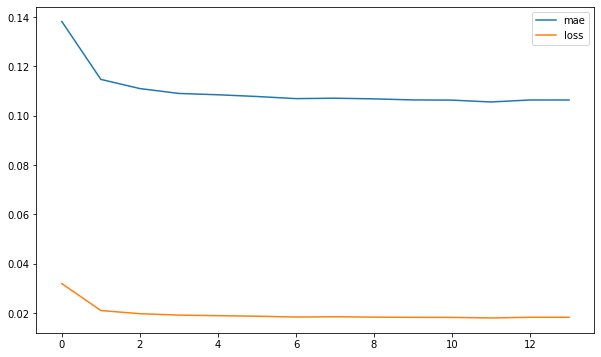

In [93]:

# plot MAE and loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show() 

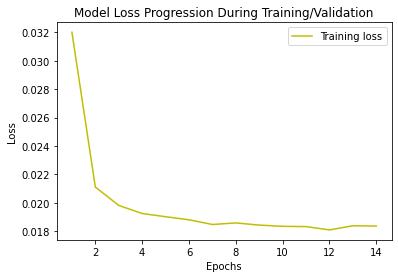

In [94]:
loss= history.history['loss']

epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')

plt.title('Model Loss Progression During Training/Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

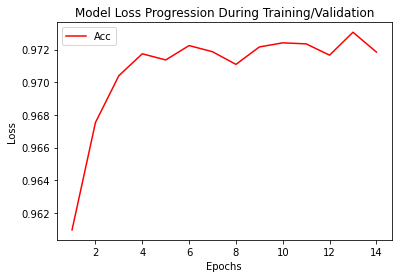

In [95]:

accuracy=history.history['accuracy']
epochs=range(1,len(loss)+1)
plt.plot(epochs,accuracy, 'r', label='Acc')
plt.title('Model Loss Progression During Training/Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [96]:
validation_x[0].shape

(10, 14)

In [97]:
validation_x.shape
test_data = np.reshape(validation_x[0],(1, validation_x[0].shape[0], validation_x[0].shape[1]))

In [98]:
test = model.predict(test_data)
test

1/1 [==============================] - 0s 39ms/step


array([[-0.38544267,  0.78175056]], dtype=float32)

In [99]:
trainPredict.shape

(47773, 2)

In [100]:
from sklearn.metrics import mean_squared_error

trainScore = np.sqrt(mean_squared_error(train_y, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(validation_y, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.10 RMSE
Test Score: 0.11 RMSE


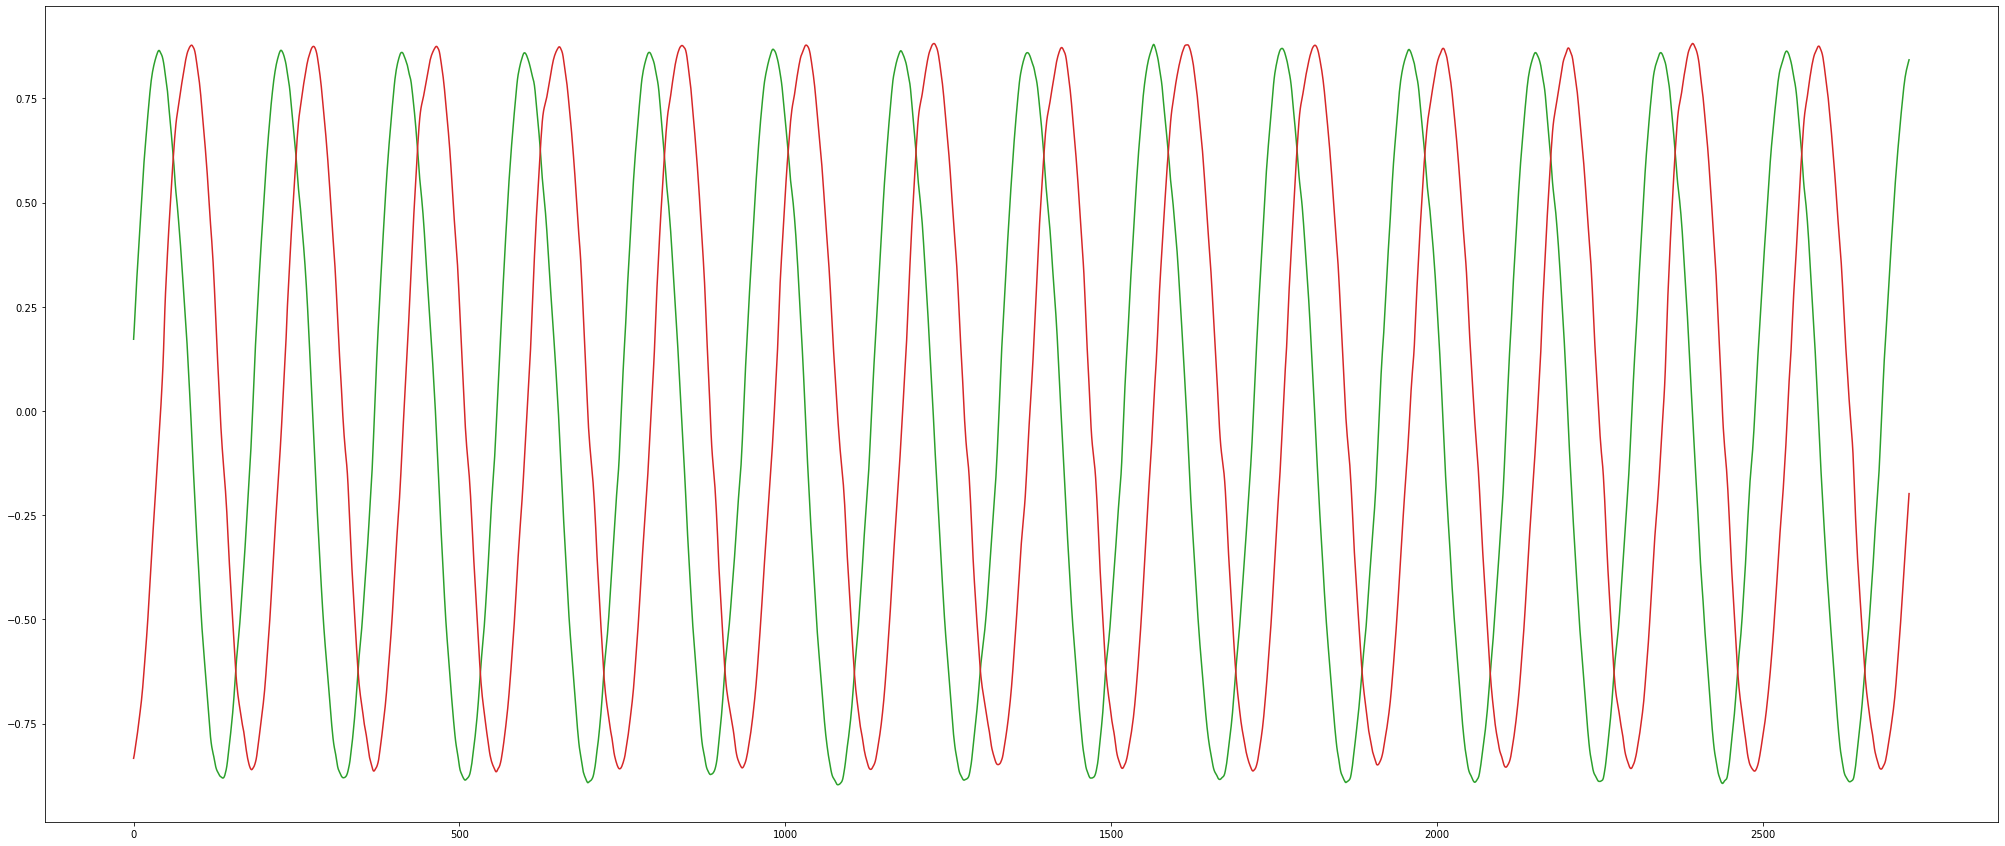

In [101]:
trainPredictPlot = np.empty_like(target)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(target)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(target)-10, :] = testPredict
# plot baseline and predictions

fig=plt.figure(figsize=(35,15))
plt.plot(trainPredictPlot[57000:])
plt.plot(testPredictPlot[57000:])
plt.show()


In [102]:
pred = np.zeros((len(testPredict),1))

for iter in range(len(testPredict)):
  x = testPredict[iter][0]
  y = testPredict[iter][1]
  pred[iter] = ((math.atan2(y,x) + 2*math.pi) % (2*math.pi)) * (100 / (2*math.pi))


In [103]:
actual = np.zeros((len(validation_y),1))

for iter in range(len(validation_y)):
  x =validation_y[iter][0]
  y =validation_y[iter][1]
  actual[iter] = ((math.atan2(y,x) + 2*math.pi) % (2*math.pi)) * (100 / (2*math.pi))

In [104]:
correct = 0
for iter in range(len(actual)):
  if (abs(actual[iter] - pred[iter]) <= 2):
    correct+=1

print(correct)
print(len(actual))

print("Precision: ", correct * 100/len(actual))

9196
11931
Precision:  77.07652334255302


In [105]:
sum = 0
for iter in range(len(actual)):
    sum = sum + (abs(actual[iter] - pred[iter])) ** 2
rmse = math.sqrt(sum / len(actual))
print("Predicting Percentage RMSE: ", rmse)

perc_rmse = np.sqrt(mean_squared_error(actual, pred))
print("Predicting Percentage RMSE: ", perc_rmse)



Predicting Percentage RMSE:  12.344140733538211
Predicting Percentage RMSE:  12.344140733538199


Text(0, 0.5, 'Percentage (%)')

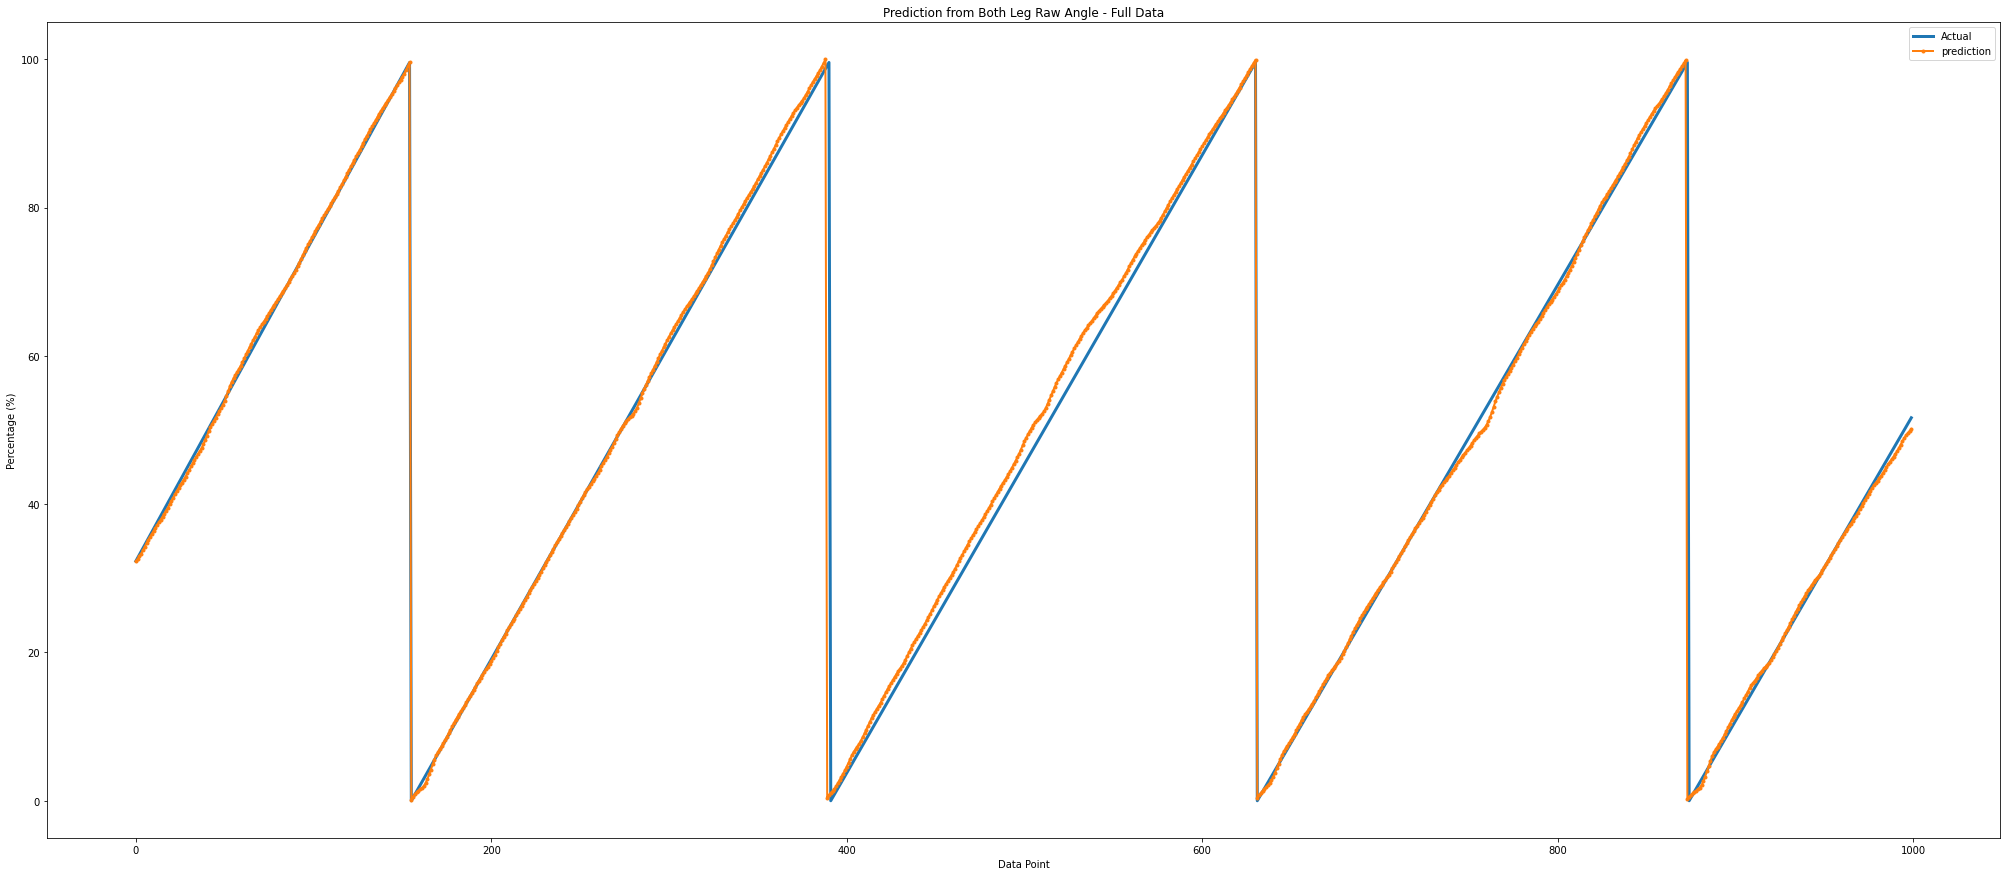

In [106]:
#plt.plot(Y[52272:52470],LShank[52272:52470],'--',label='Actual')
#plt.plot(pred,LShank,'--',label='prediction')
fig=plt.figure(figsize=(35,15))

plt.plot(actual[0:1000],'-',label='Actual', linewidth = 3)
plt.plot(pred[0:1000],'.-',label='prediction', linewidth = 2)



#plt.plot(actual[350:556],Rfoot[350:556],'.',label='Actual')
#plt.plot(pred[350:556],Rfoot[350:556],'.',label='prediction')

plt.legend()
plt.title('Prediction from Both Leg Raw Angle - Full Data')
#plt.title('Right Foot')
#plt.ylabel('Angle')
#plt.xlabel('Gait Cycle Percentage')
plt.xlabel('Data Point')
plt.ylabel('Percentage (%)')

Text(0.5, 1.0, 'Actual vs Prediction')

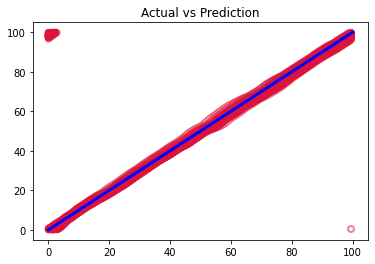

In [107]:
plt.scatter(actual, pred, facecolors='none', edgecolors='crimson',alpha=0.4)
p1 = max(max(pred), max(actual))
p2 = min(min(pred), min(actual))

ci = 0.1 * np.std([p1,p2]) / np.mean([p1,p2])

plt.plot([p1, p2], [p1, p2], 'b-', linewidth =3)
plt.title('Actual vs Prediction')

In [108]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(18, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
                 label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

In [109]:
#class PolicyDataset(Dataset):
#    def __init__(self, data, target, transform=None):
#        self.data = data
#        self.target = target
        #self.label_split_idx = label_split_idx # not sure if splitting in dataset or in network is better idea.
        #self.use_cuda_if_avaiable = use_cuda_if_avaiable

#        return 
#    def __len__(self):
#        return self.data.shape[0]

#    def __getitem__(self, idx):
#        return self.data[idx, ], self.target[idx, ]

#training_dataset = PolicyDataset(training_data, training_target)
#validation_dataset = PolicyDataset(validation_data, validation_target)


In [110]:
#class LSTM(nn.Module):
#    def __init__(self, hidden_layers=64):
#        super(LSTM, self).__init__()
#        self.hidden_layers = hidden_layers
        # lstm1, lstm2, linear are all layers in the network
#        self.lstm1 = nn.LSTMCell(1, self.hidden_layers)
#        self.lstm2 = nn.LSTMCell(self.hidden_layers, self.hidden_layers)
#        self.linear = nn.Linear(self.hidden_layers, 2)
        
#    def forward(self, y, future_preds=0):
#        outputs, n_samples = [], y.size(0)
#        h_t = torch.zeros(n_samples, self.hidden_layers, dtype=torch.float32)
#        c_t = torch.zeros(n_samples, self.hidden_layers, dtype=torch.float32)
#        h_t2 = torch.zeros(n_samples, self.hidden_layers, dtype=torch.float32)
#        c_t2 = torch.zeros(n_samples, self.hidden_layers, dtype=torch.float32)
        
#        for time_step in y.split(1, dim=1):
            # N, 1
#            h_t, c_t = self.lstm1(input_t, (h_t, c_t)) # initial hidden and cell states
#            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2)) # new hidden and cell states
#            output = self.linear(h_t2) # output from the last FC layer
#            outputs.append(output)
            
#        for i in range(future_preds):
            # this only generates future predictions if we pass in future_preds>0
            # mirrors the code above, using last output/prediction as input
#            h_t, c_t = self.lstm1(output, (h_t, c_t))
#            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
#            output = self.linear(h_t2)
#            outputs.append(output)
        # transform list to tensor    
#        outputs = torch.cat(outputs, dim=1)
#        return outputs

In [111]:
# Divide data into batches: (gait cycle length) 

#num_feature = len(source_table.keys()) - 1
#num_feature

#N = 1 # Total number of gait cycles
#L = 1 # Length of longest cycle
#length = 0
#for i in range(len(source_table)):
#    length = length + 1
#    if source_table['perc'][i] == 0:
#        N = N + 1
#        if length - 1 > L:
#            L = length - 1
#        length = 1
        
#print(N)x_data = [[[0 for k in range(num_feature)] for j in range(L)] for i in range(N-1)]
#y_data = [[[0 for k in range(2)] for j in range(L)] for i in range(N-1)]
#print(pd.DataFrame(x_data).shape)
#print(x_data)
#no_gait = 0
#size = 0
#for i in range(len(source_table)):
#    if source_table['perc'][i] == 0:
#        if size == 0:
#            x_data[no_gait][size][:] = x_scaled.iloc[i]
#            y_data[no_gait][size][:] = y.iloc[i]
#            size = size + 1
#        else:
#            while size < L:
#                x_data[no_gait][size][:] = [0 in range(num_feature)]
#                y_data[no_gait][size][:] = [0 in range(2)]
#                size = size + 1
#            no_gait = no_gait + 1
#            size = 0
#    else:
#        x_data[no_gait][size][:] = x_scaled.iloc[i]
#        y_data[no_gait][size][:] = y.iloc[i]
#        size = size + 1
#        if size >= L:
#            size = 0
#            no_gait = no_gait + 1
#print(L)